In [136]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk 
import string
import re
import plotly.graph_objects as go
import plotly as px
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer,WordNetLemmatizer
from nltk.corpus import wordnet
from nltk.corpus import stopwords
from sklearn.metrics import confusion_matrix, accuracy_score,make_scorer
from IPython.display import display, Image
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.datasets import load_iris
import joblib
from xgboost import XGBClassifier
from sklearn.ensemble import HistGradientBoostingClassifier

In [137]:
data=pd.read_csv("breast_cancer_bd.csv",na_values=['?','UNDEFINED'])
data.head()

,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,5,1,1,1,2,1.0,3,1,1,2
1,5,4,4,5,7,10.0,3,2,1,2
2,3,1,1,1,2,2.0,3,1,1,2
3,6,8,8,1,3,4.0,3,7,1,2
4,4,1,1,3,2,1.0,3,1,1,2


In [138]:
data=data.replace({
    'Class':{2:0,4:1}
})
len(data)
data.head()

,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,5,1,1,1,2,1.0,3,1,1,0
1,5,4,4,5,7,10.0,3,2,1,0
2,3,1,1,1,2,2.0,3,1,1,0
3,6,8,8,1,3,4.0,3,7,1,0
4,4,1,1,3,2,1.0,3,1,1,0


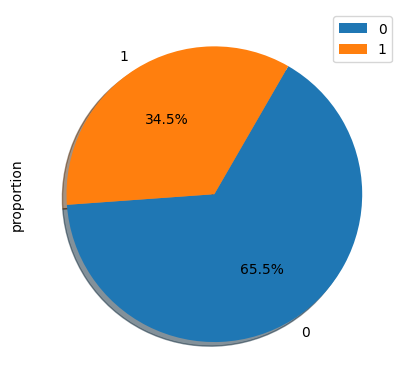

In [139]:
data.Class.value_counts(normalize=True).plot.pie(autopct='%1.1f%%',shadow=True,startangle=60,counterclock=False)
plt.legend()
plt.show()

In [140]:
data.duplicated().sum()

236

In [141]:
data.drop_duplicates(inplace=True)


In [142]:
data.duplicated().sum()

0

In [143]:
data.isnull().sum()

Clump_Thickness                 0
Uniformity_of_Cell_Size         0
Uniformity_of_Cell_Shape        0
Marginal_Adhesion               0
Single_Epithelial_Cell_Size     0
Bare_Nuclei                    14
Bland_Chromatin                 0
Normal_Nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64

In [144]:
#filling none values
means=data['Bare_Nuclei'].mean()
data=data.fillna(means)
data.head()
#data cleaning is over

,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,5,1,1,1,2,1.0,3,1,1,0
1,5,4,4,5,7,10.0,3,2,1,0
2,3,1,1,1,2,2.0,3,1,1,0
3,6,8,8,1,3,4.0,3,7,1,0
4,4,1,1,3,2,1.0,3,1,1,0


In [145]:
data.isnull().sum()

Clump_Thickness                0
Uniformity_of_Cell_Size        0
Uniformity_of_Cell_Shape       0
Marginal_Adhesion              0
Single_Epithelial_Cell_Size    0
Bare_Nuclei                    0
Bland_Chromatin                0
Normal_Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

In [146]:
data['Clump_Thickness'].unique()

array([ 5,  3,  6,  4,  8,  1,  2,  7, 10,  9], dtype=int64)

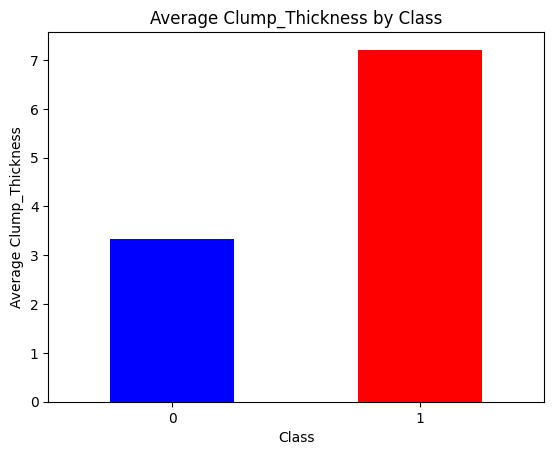

In [147]:
avg_thickness = data.groupby('Class')['Clump_Thickness'].mean()
avg_thickness.plot(kind='bar', color=['blue', 'red'])
plt.xlabel('Class')
plt.ylabel('Average Clump_Thickness')
plt.title('Average Clump_Thickness by Class')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show()

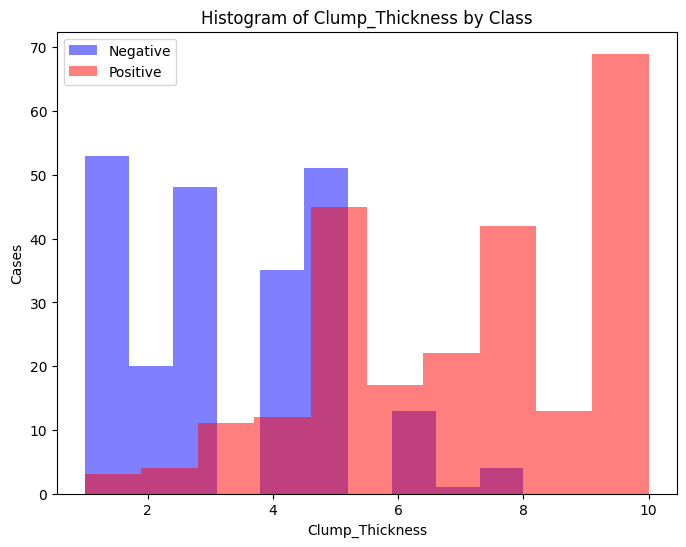

In [148]:
class_A = data[data['Class'] == 0]['Clump_Thickness']
class_B = data[data['Class'] == 1]['Clump_Thickness']
plt.figure(figsize=(8, 6))
plt.hist(class_A, bins=10, alpha=0.5, label='Negative', color='blue')
plt.hist(class_B, bins=10, alpha=0.5, label='Positive', color='red')
plt.xlabel('Clump_Thickness')
plt.ylabel('Cases')
plt.title('Histogram of Clump_Thickness by Class')
plt.legend()
plt.show()

In [149]:
data['Uniformity_of_Cell_Size'].unique()

array([ 1,  4,  8, 10,  2,  3,  7,  5,  6,  9], dtype=int64)

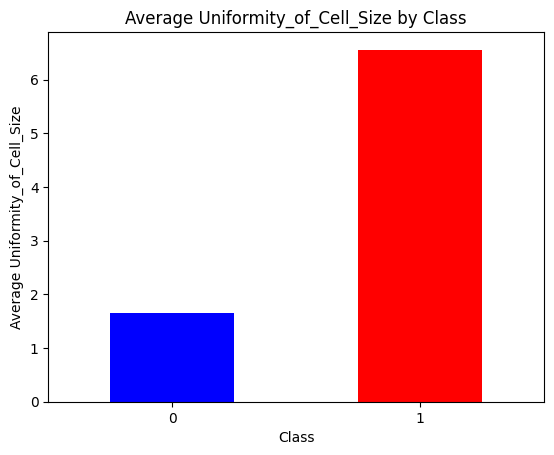

In [150]:
avg_thickness = data.groupby('Class')['Uniformity_of_Cell_Size'].mean()
avg_thickness.plot(kind='bar', color=['blue', 'red'])
plt.xlabel('Class')
plt.ylabel('Average Uniformity_of_Cell_Size')
plt.title('Average Uniformity_of_Cell_Size by Class')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show()

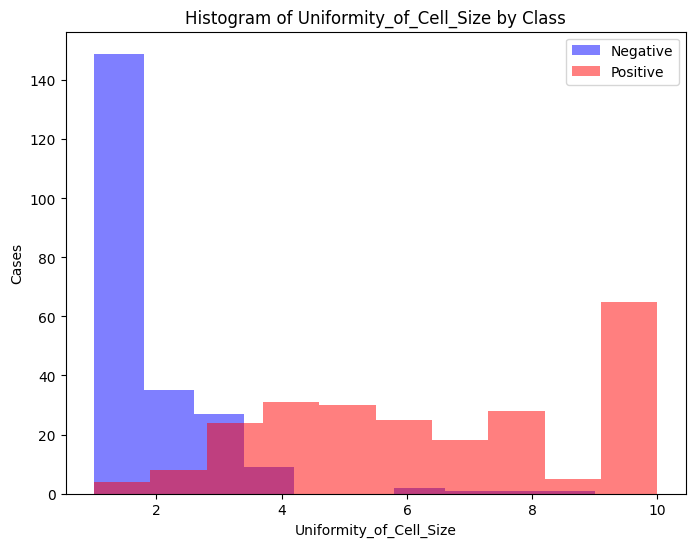

In [151]:
class_A = data[data['Class'] == 0]['Uniformity_of_Cell_Size']
class_B = data[data['Class'] == 1]['Uniformity_of_Cell_Size']
plt.figure(figsize=(8, 6))
plt.hist(class_A, bins=10, alpha=0.5, label='Negative', color='blue')
plt.hist(class_B, bins=10, alpha=0.5, label='Positive', color='red')
plt.xlabel('Uniformity_of_Cell_Size')
plt.ylabel('Cases')
plt.title('Histogram of Uniformity_of_Cell_Size by Class')
plt.legend()
plt.show()

In [152]:
data['Uniformity_of_Cell_Shape'].unique()

array([ 1,  4,  8, 10,  2,  3,  5,  6,  7,  9], dtype=int64)

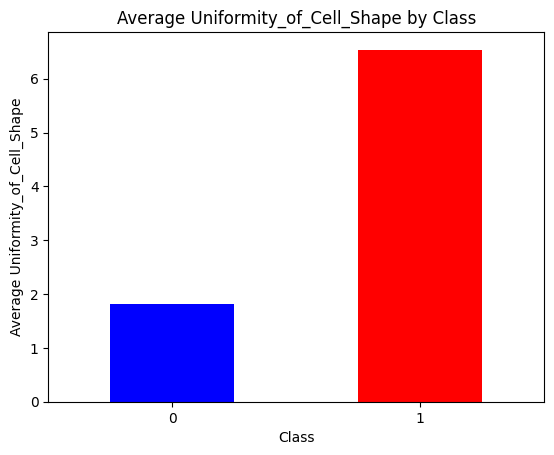

In [153]:
avg_thickness = data.groupby('Class')['Uniformity_of_Cell_Shape'].mean()
avg_thickness.plot(kind='bar', color=['blue', 'red'])
plt.xlabel('Class')
plt.ylabel('Average Uniformity_of_Cell_Shape')
plt.title('Average Uniformity_of_Cell_Shape by Class')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show()

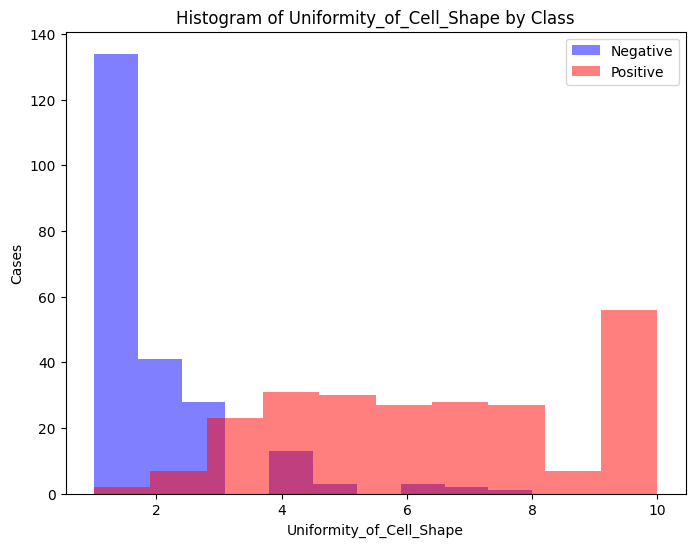

In [154]:
class_A = data[data['Class'] == 0]['Uniformity_of_Cell_Shape']
class_B = data[data['Class'] == 1]['Uniformity_of_Cell_Shape']
plt.figure(figsize=(8, 6))
plt.hist(class_A, bins=10, alpha=0.5, label='Negative', color='blue')
plt.hist(class_B, bins=10, alpha=0.5, label='Positive', color='red')
plt.xlabel('Uniformity_of_Cell_Shape')
plt.ylabel('Cases')
plt.title('Histogram of Uniformity_of_Cell_Shape by Class')
plt.legend()
plt.show()

In [155]:
data['Marginal_Adhesion'].unique()

array([ 1,  5,  3,  8, 10,  4,  6,  2,  9,  7], dtype=int64)

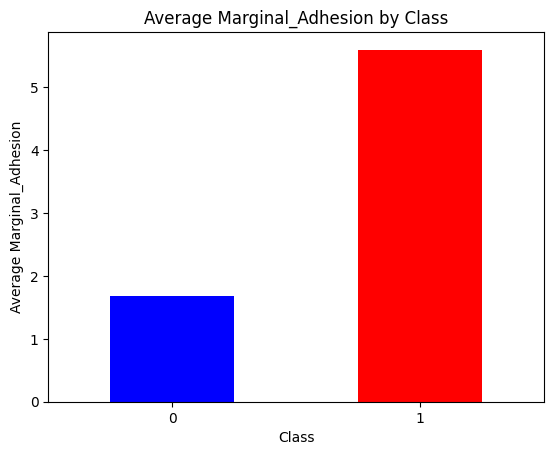

In [156]:
avg_thickness = data.groupby('Class')['Marginal_Adhesion'].mean()
avg_thickness.plot(kind='bar', color=['blue', 'red'])
plt.xlabel('Class')
plt.ylabel('Average Marginal_Adhesion')
plt.title('Average Marginal_Adhesion by Class')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show()

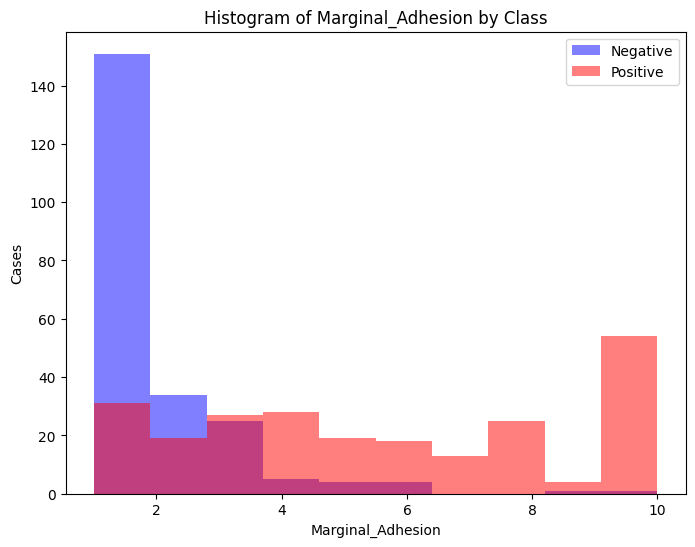

In [157]:
class_A = data[data['Class'] == 0]['Marginal_Adhesion']
class_B = data[data['Class'] == 1]['Marginal_Adhesion']
plt.figure(figsize=(8, 6))
plt.hist(class_A, bins=10, alpha=0.5, label='Negative', color='blue')
plt.hist(class_B, bins=10, alpha=0.5, label='Positive', color='red')
plt.xlabel('Marginal_Adhesion')
plt.ylabel('Cases')
plt.title('Histogram of Marginal_Adhesion by Class')
plt.legend()
plt.show()

In [158]:
data['Single_Epithelial_Cell_Size'].unique()

array([ 2,  7,  3,  1,  6,  4,  5,  8, 10,  9], dtype=int64)

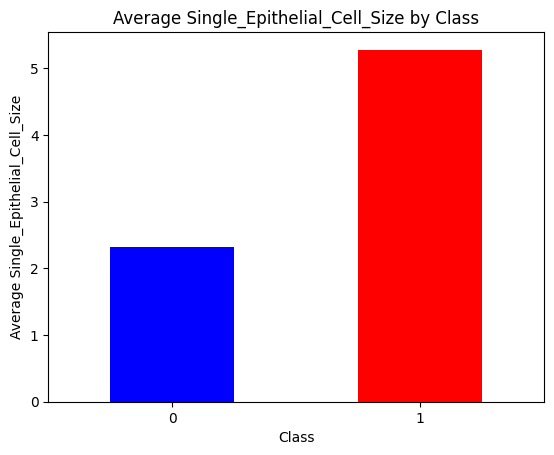

In [159]:
avg_thickness = data.groupby('Class')['Single_Epithelial_Cell_Size'].mean()
avg_thickness.plot(kind='bar', color=['blue', 'red'])
plt.xlabel('Class')
plt.ylabel('Average Single_Epithelial_Cell_Size')
plt.title('Average Single_Epithelial_Cell_Size by Class')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show()

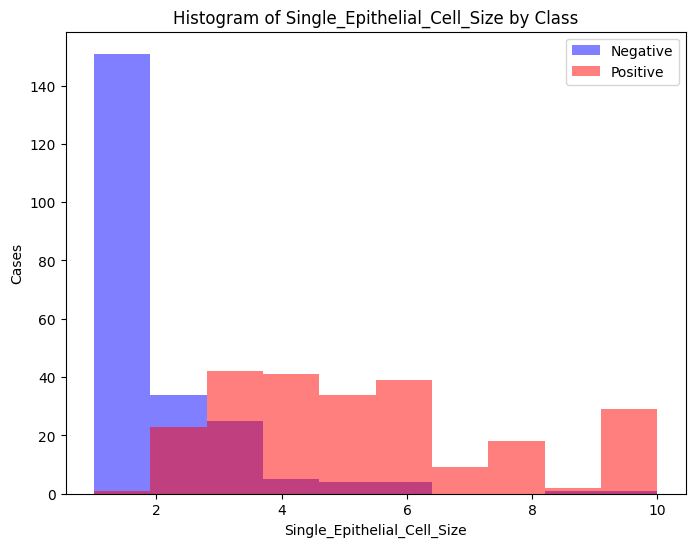

In [160]:
vclass_A = data[data['Class'] == 0]['Single_Epithelial_Cell_Size']
class_B = data[data['Class'] == 1]['Single_Epithelial_Cell_Size']
plt.figure(figsize=(8, 6))
plt.hist(class_A, bins=10, alpha=0.5, label='Negative', color='blue')
plt.hist(class_B, bins=10, alpha=0.5, label='Positive', color='red')
plt.xlabel('Single_Epithelial_Cell_Size')
plt.ylabel('Cases')
plt.title('Histogram of Single_Epithelial_Cell_Size by Class')
plt.legend()
plt.show()

In [161]:
data['Bare_Nuclei'].unique()

array([ 1.        , 10.        ,  2.        ,  4.        ,  3.        ,
        9.        ,  7.        ,  4.80623608,  5.        ,  8.        ,
        6.        ])

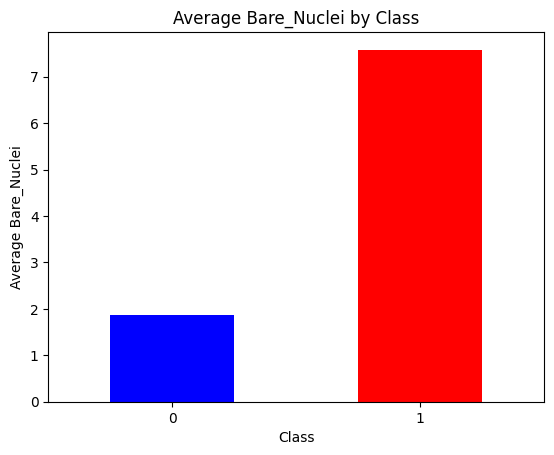

In [162]:
avg_thickness = data.groupby('Class')['Bare_Nuclei'].mean()
avg_thickness.plot(kind='bar', color=['blue', 'red'])
plt.xlabel('Class')
plt.ylabel('Average Bare_Nuclei')
plt.title('Average Bare_Nuclei by Class')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show()

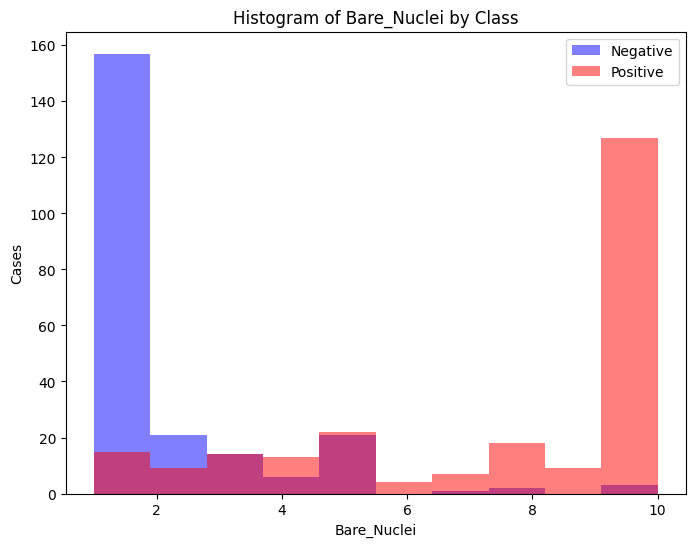

In [163]:
class_A = data[data['Class'] == 0]['Bare_Nuclei']
class_B = data[data['Class'] == 1]['Bare_Nuclei']
plt.figure(figsize=(8, 6))
plt.hist(class_A, bins=10, alpha=0.5, label='Negative', color='blue')
plt.hist(class_B, bins=10, alpha=0.5, label='Positive', color='red')
plt.xlabel('Bare_Nuclei')
plt.ylabel('Cases')
plt.title('Histogram of Bare_Nuclei by Class')
plt.legend()
plt.show()

In [164]:
data['Bland_Chromatin'].unique()

array([ 3,  9,  1,  2,  4,  5,  7,  8,  6, 10], dtype=int64)

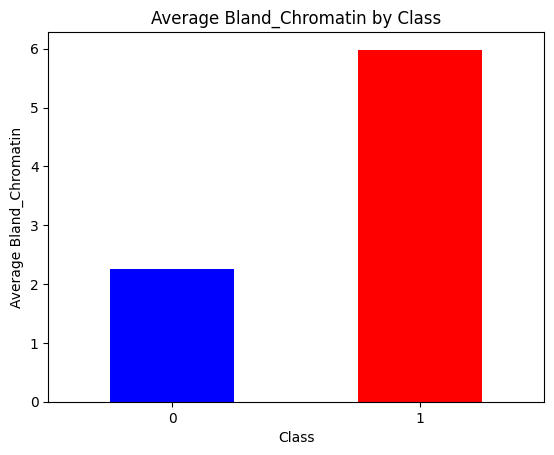

In [165]:
avg_thickness = data.groupby('Class')['Bland_Chromatin'].mean()
avg_thickness.plot(kind='bar', color=['blue', 'red'])
plt.xlabel('Class')
plt.ylabel('Average Bland_Chromatin')
plt.title('Average Bland_Chromatin by Class')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show()

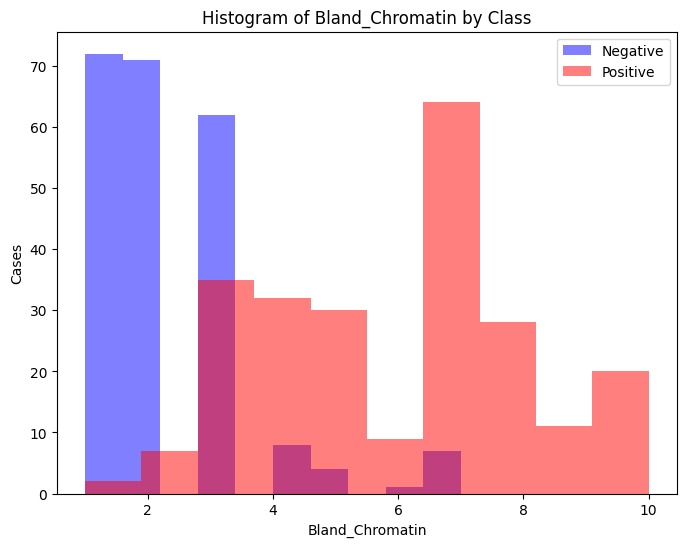

In [166]:
class_A = data[data['Class'] == 0]['Bland_Chromatin']
class_B = data[data['Class'] == 1]['Bland_Chromatin']
plt.figure(figsize=(8, 6))
plt.hist(class_A, bins=10, alpha=0.5, label='Negative', color='blue')
plt.hist(class_B, bins=10, alpha=0.5, label='Positive', color='red')
plt.xlabel('Bland_Chromatin')
plt.ylabel('Cases')
plt.title('Histogram of Bland_Chromatin by Class')
plt.legend()
plt.show()

In [167]:
data['Normal_Nucleoli'].unique()

array([ 1,  2,  7,  4,  5,  3, 10,  6,  9,  8], dtype=int64)

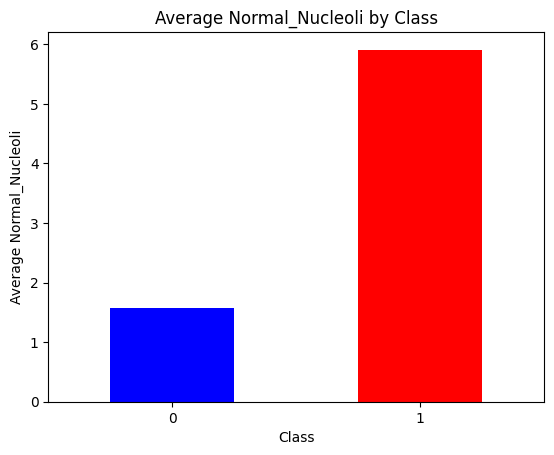

In [168]:
avg_thickness = data.groupby('Class')['Normal_Nucleoli'].mean()
avg_thickness.plot(kind='bar', color=['blue', 'red'])
plt.xlabel('Class')
plt.ylabel('Average Normal_Nucleoli')
plt.title('Average Normal_Nucleoli by Class')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show()

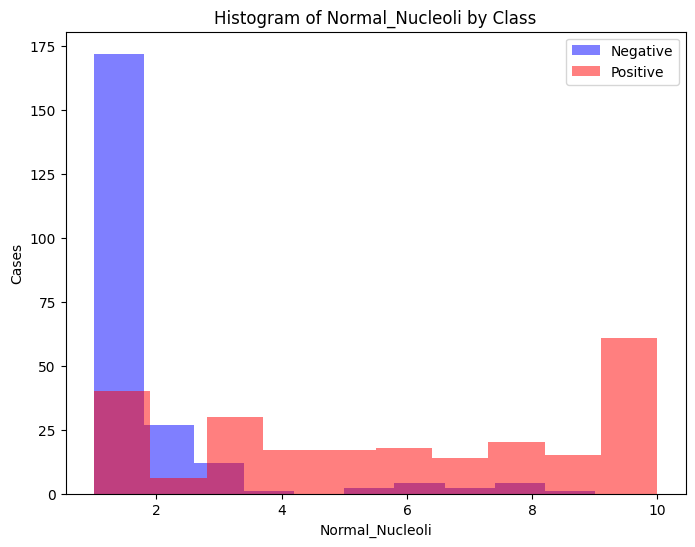

In [169]:
class_A = data[data['Class'] == 0]['Normal_Nucleoli']
class_B = data[data['Class'] == 1]['Normal_Nucleoli']
plt.figure(figsize=(8, 6))
plt.hist(class_A, bins=10, alpha=0.5, label='Negative', color='blue')
plt.hist(class_B, bins=10, alpha=0.5, label='Positive', color='red')
plt.xlabel('Normal_Nucleoli')
plt.ylabel('Cases')
plt.title('Histogram of Normal_Nucleoli by Class')
plt.legend()
plt.show()

In [170]:
data['Mitoses'].unique()

array([ 1,  5,  4,  2,  3,  7, 10,  8,  6], dtype=int64)

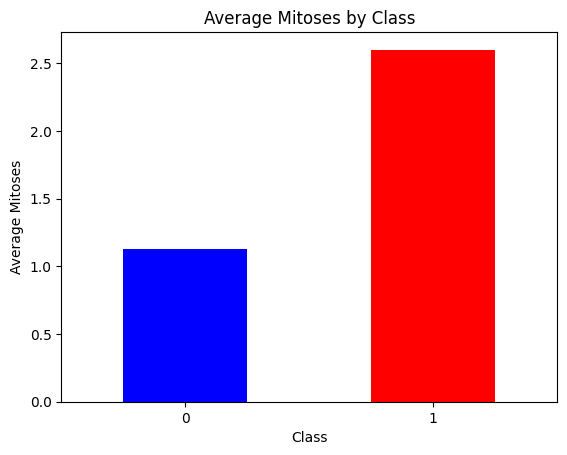

In [171]:
avg_thickness = data.groupby('Class')['Mitoses'].mean()
avg_thickness.plot(kind='bar', color=['blue', 'red'])
plt.xlabel('Class')
plt.ylabel('Average Mitoses')
plt.title('Average Mitoses by Class')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show()

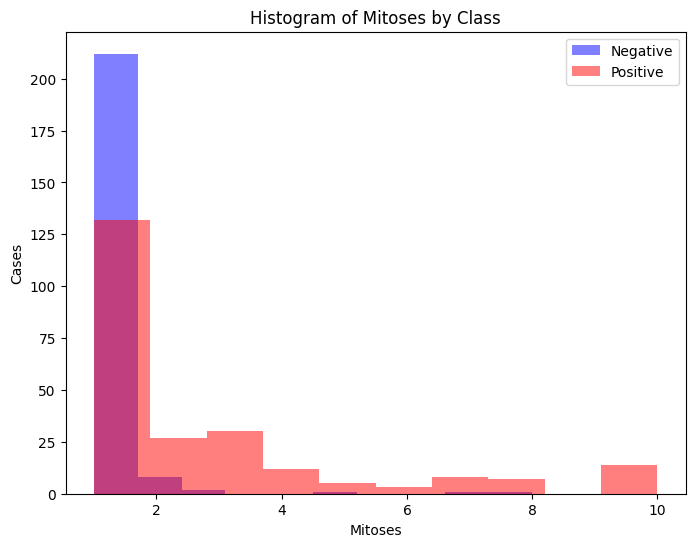

In [172]:
class_A = data[data['Class'] == 0]['Mitoses']
class_B = data[data['Class'] == 1]['Mitoses']
plt.figure(figsize=(8, 6))
plt.hist(class_A, bins=10, alpha=0.5, label='Negative', color='blue')
plt.hist(class_B, bins=10, alpha=0.5, label='Positive', color='red')
plt.xlabel('Mitoses')
plt.ylabel('Cases')
plt.title('Histogram of Mitoses by Class')
plt.legend()
plt.show()

In [173]:
data_input=data.drop(columns='Class')
data_output=data['Class']

0      0
1      0
2      0
3      0
4      0
      ..
693    0
694    0
696    1
697    1
698    1
Name: Class, Length: 463, dtype: int64

In [174]:
x,x_test,y,y_test=train_test_split(
    data_input,data_output,test_size=0.2,random_state=0,shuffle=True
)
x_train,x_val,y_train,y_val=train_test_split(
    x,y,test_size=0.2,random_state=0,shuffle=True
)


 Test accuracy: 0.8918918918918919

 Train accuracy: 1.0


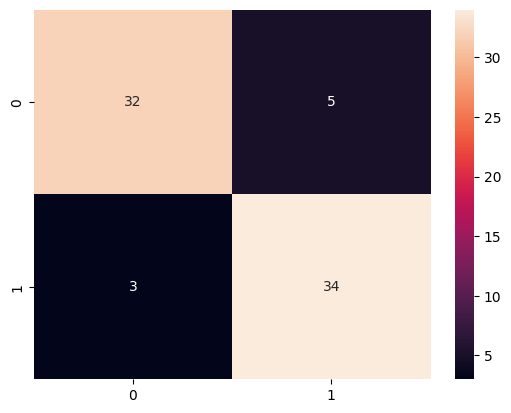

In [175]:
model_RF = RandomForestClassifier(random_state=42,n_estimators=100)
model_RF.fit(x_train, y_train)
y_pred = model_RF.predict(x_val)
accuracy_val = accuracy_score(y_val, y_pred)
accuracy_train = accuracy_score(y_train, model_RF.predict(x_train))
cm=confusion_matrix(y_val, y_pred)
sns.heatmap(cm ,annot =True)
print("\n val accuracy:",accuracy_val)
print("\n Train accuracy:",accuracy_train)


 Test accuracy: 0.9354838709677419

 Train accuracy: 1.0


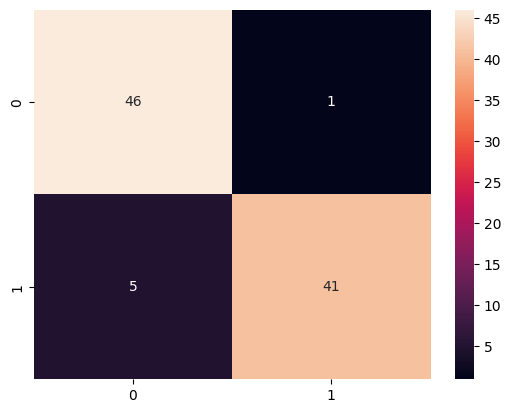

In [176]:
model_RF = RandomForestClassifier(random_state=42,n_estimators=100)
model_RF.fit(x_train, y_train)
y_pred = model_RF.predict(x_test)
accuracy_test = accuracy_score(y_test, y_pred)
accuracy_train = accuracy_score(y_train, model_RF.predict(x_train))
cm=confusion_matrix(y_test, y_pred)
sns.heatmap(cm ,annot =True)
print("\n Test accuracy:",accuracy_test)
print("\n Train accuracy:",accuracy_train)


 Test accuracy: 0.946236559139785

 Train accuracy: 0.972972972972973


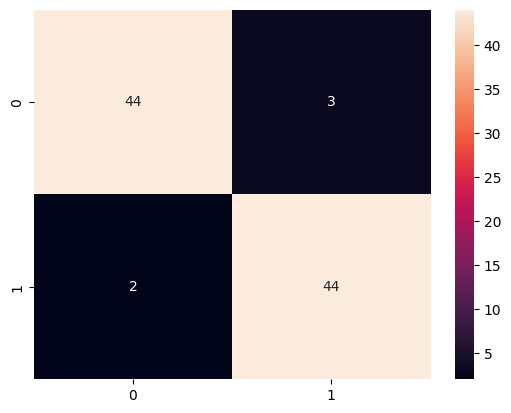

In [177]:
model_SVM = SVC()
model_SVM.fit(x_train, y_train)
y_pred = model_SVM.predict(x_test)
accuracy_test = accuracy_score(y_test, y_pred)
accuracy_train = accuracy_score(y_train, model_SVM.predict(x_train))
cm=confusion_matrix(y_test, y_pred)
sns.heatmap(cm ,annot =True)
print("\n Test accuracy:",accuracy_test)
print("\n Train accuracy:",accuracy_train)


 Test accuracy: 0.9354838709677419

 Train accuracy: 0.9695945945945946


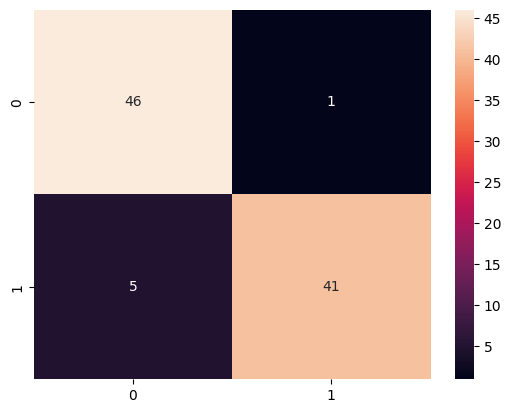

In [178]:
model_KNN= KNeighborsClassifier(n_neighbors=5)
model_KNN.fit(x_train, y_train)
y_pred = model_KNN.predict(x_test)
accuracy_test = accuracy_score(y_test, y_pred)
accuracy_train = accuracy_score(y_train, model_KNN.predict(x_train))
cm=confusion_matrix(y_test, y_pred)
sns.heatmap(cm ,annot =True)
print("\n Test accuracy:",accuracy_test)
print("\n Train accuracy:",accuracy_train)


 Test accuracy: 0.946236559139785

 Train accuracy: 0.9594594594594594


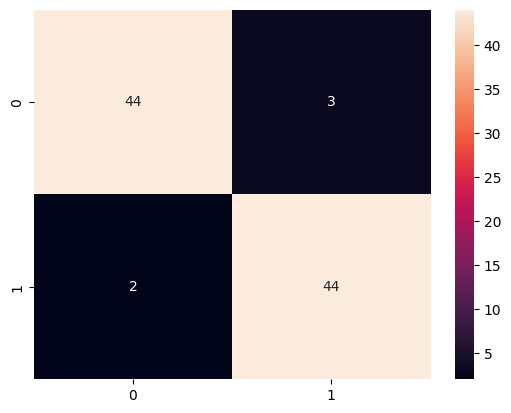

In [179]:
model_NB = GaussianNB()
model_NB.fit(x_train, y_train)
y_pred = model_NB.predict(x_test)
accuracy_test = accuracy_score(y_test, y_pred)
accuracy_train = accuracy_score(y_train, model_NB.predict(x_train))
cm=confusion_matrix(y_test, y_pred)
sns.heatmap(cm ,annot =True)
print("\n Test accuracy:",accuracy_test)
print("\n Train accuracy:",accuracy_train)

In [180]:
classifier = LogisticRegression()
scorer = make_scorer(accuracy_score)
cv_scores = cross_val_score(classifier, data_input, data_output, cv=5, scoring=scorer)
for fold, score in enumerate(cv_scores):
    print(f"Fold {fold+1} accuracy:", score)
mean_accuracy = cv_scores.mean()
print("Mean accuracy:", mean_accuracy)

Fold 1 accuracy: 0.8924731182795699
Fold 2 accuracy: 0.946236559139785
Fold 3 accuracy: 0.9354838709677419
Fold 4 accuracy: 0.9565217391304348
Fold 5 accuracy: 0.9891304347826086
Mean accuracy: 0.943969144460028
